In [3]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 1.4 MB/s eta 0:00:07
   ----- ---------------------------------- 1.3/9.9 MB 2.4 MB/s eta 0:00:04
   ------- -------------------------------- 1.8/9.9 MB 2.5 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/9.9 MB 2.4 MB/s eta 0:00:04
   ---------- ----------------------------- 2.6/9.9 MB 2.2 MB/s eta 0:00:04
   ----------- ---------------------------- 2.9/9.9 MB 2.0 MB/s eta 0:00:04
   ------------ --------------------------- 3.1/9.9 MB 1.9 MB/s eta 0:00:04
   ------------ --------------------------- 3.1/9.9 MB 1.9 MB/s eta 0:00:04
   ------------- -------------------------- 3.4/9.9 MB 1.8 MB/s eta 0:00:04
   ------------- -------------------------- 3.4/9.9 MB 1.8 MB/s eta 0:00:04
   ------------- -------------------------- 3.4/9.9 MB 1.8 MB/s eta 0:00:04
   -------------- --------

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
import pandas as pd
import numpy as np

In [3]:
miles_decomp_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])

In [4]:
miles_decomp_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [5]:
miles_decomp_df.index = miles_decomp_df['Month']

In [6]:
result = seasonal_decompose(miles_decomp_df['MilesMM'], model='additive')

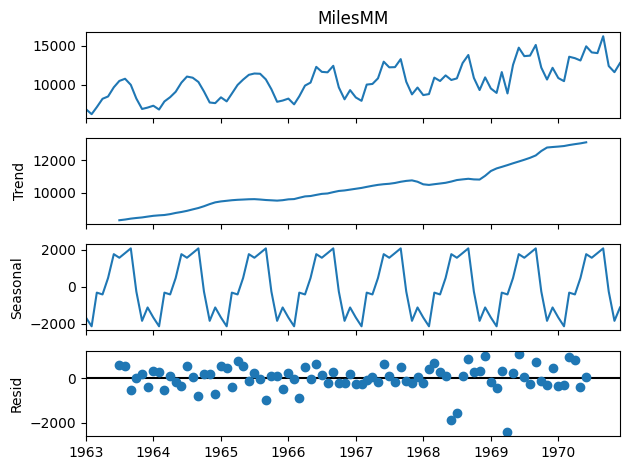

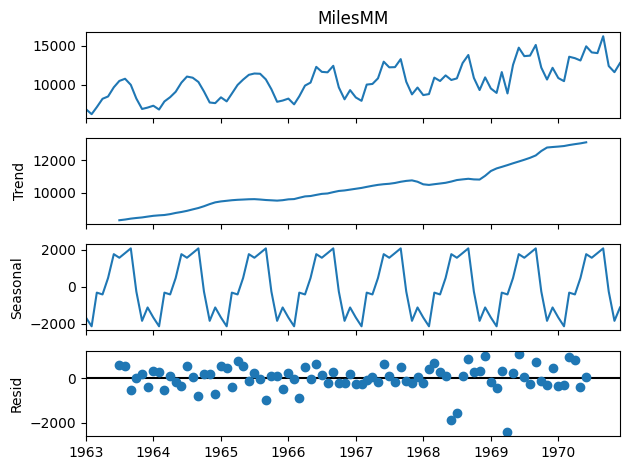

In [7]:
result.plot()

In [8]:
# Q.1) four component of time series
# Q.2) when we use multiplicative or additive
# Q.3) why these graph 2 times as output
# Q.4) why we remove trend and seasonality 

In [9]:
result2 = seasonal_decompose(miles_decomp_df['MilesMM'], model='multiplicative')

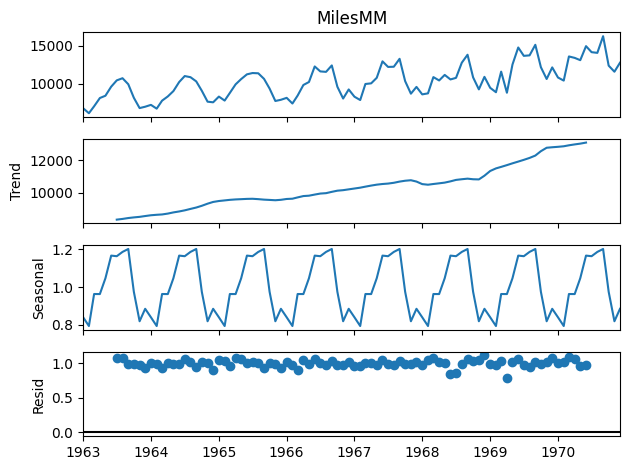

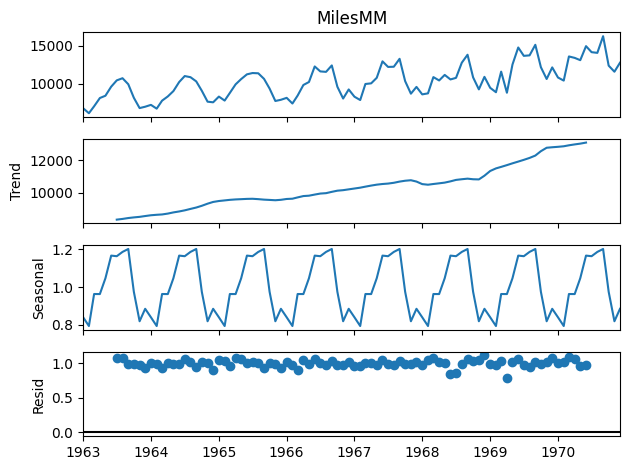

In [10]:
result2.plot()

# Differencing

In [11]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])

In [12]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [13]:
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

In [14]:
miles_df['MilesMM_diff_1'] = miles_df['MilesMM'].diff(periods=1)

In [15]:
miles_df.head()

,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


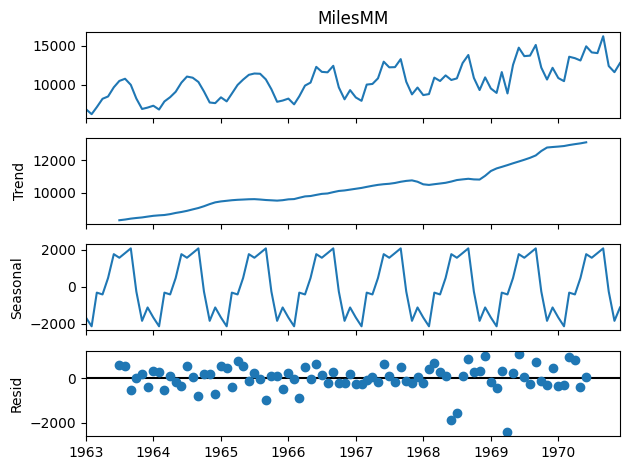

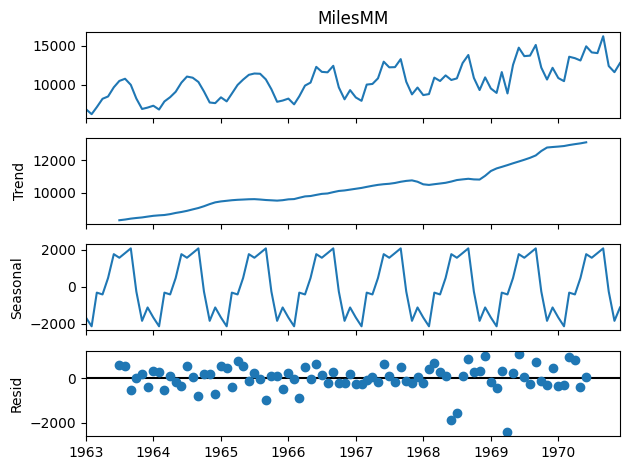

In [16]:
miles_df.index = miles_df['Month']
result_a = seasonal_decompose(miles_df['MilesMM'], model = 'additive')
result_a.plot()

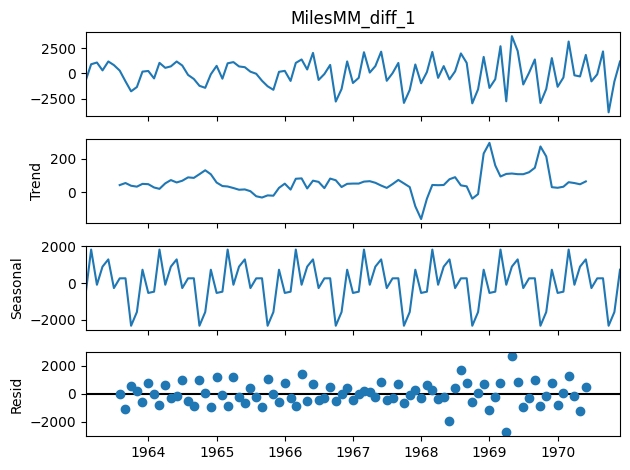

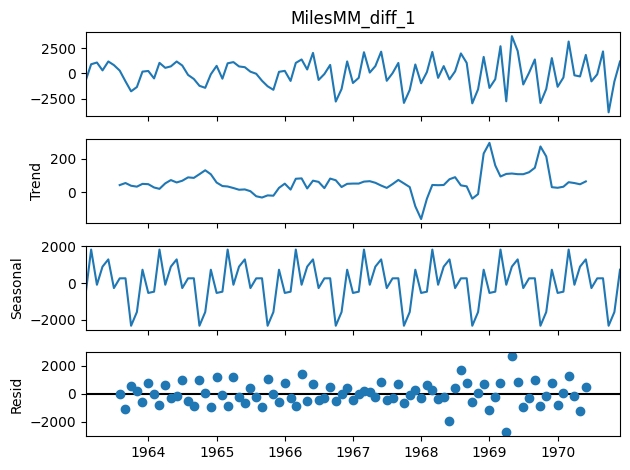

In [17]:
#Remove trend
miles_df.index = miles_df['Month']
result_b = seasonal_decompose(miles_df.iloc[1:,3], model = 'additive')
result_b.plot()

<Axes: xlabel='Month'>

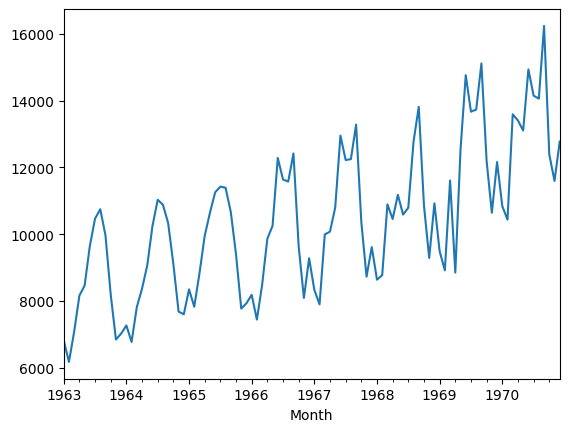

In [18]:
miles_df['MilesMM'].plot()

In [19]:
miles_df['MilesMM_diff_12'] = miles_df['MilesMM_diff_1'].diff(periods=12)

<Axes: xlabel='Month'>

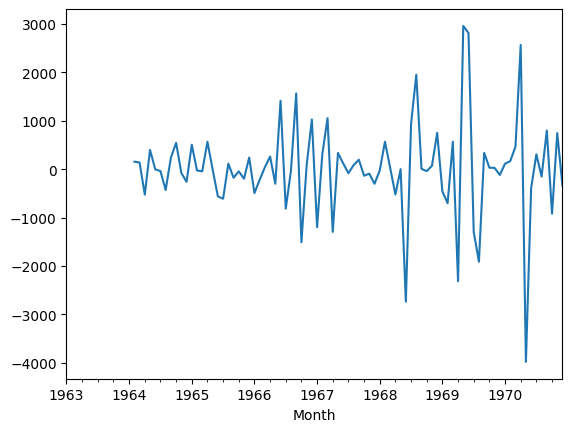

In [20]:
miles_df['MilesMM_diff_12'].plot()

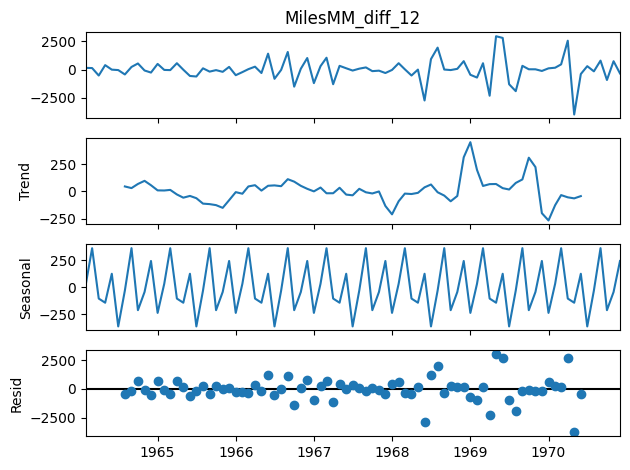

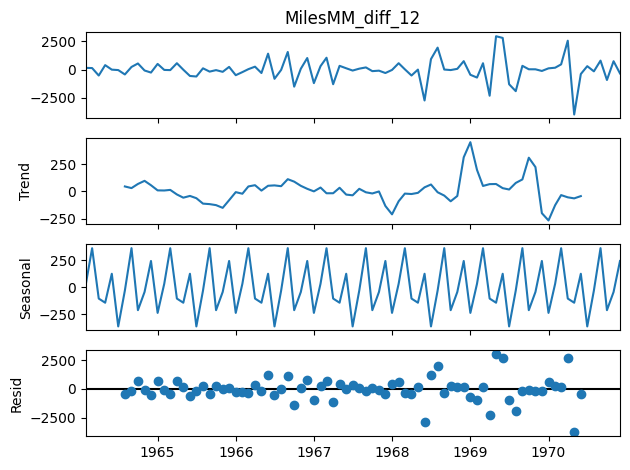

In [21]:
result_c = seasonal_decompose(miles_df.iloc[13:,4], model='additive')
result_c.plot()

In [22]:
miles_df.head(12)

,Month,MilesMM,lag1,MilesMM_diff_1,MilesMM_diff_12
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0,NaN
1963-03-01,1963-03-01,7084,6178.0,906.0,NaN
1963-04-01,1963-04-01,8162,7084.0,1078.0,NaN
1963-05-01,1963-05-01,8462,8162.0,300.0,NaN
1963-06-01,1963-06-01,9644,8462.0,1182.0,NaN
1963-07-01,1963-07-01,10466,9644.0,822.0,NaN
1963-08-01,1963-08-01,10748,10466.0,282.0,NaN
1963-09-01,1963-09-01,9963,10748.0,-785.0,NaN


# Train-Test Split

In [ ]:
temp_df = pd.read_csv('daily-min-temperatures.xls', header=0, parse_dates=)